In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

document = ["One Geek helps Two Geeks",
			"Two Geeks help Four Geeks",
			"Each Geek helps many other Geeks at GeeksforGeeks"]

# Create a Vectorizer Object
# following funcion will convert dataset into frequency of words 
vectorizer = CountVectorizer()

vectorizer.fit(document)

# Printing the identified Unique words along with their indices
print("Vocabulary: ", vectorizer.vocabulary_)

# Encode the Document
# encoding vector using onehot method
vector = vectorizer.transform(document)

# Summarizing the Encoded Texts
print("Encoded Document is:")
print(vector.toarray())


Vocabulary:  {'one': 9, 'geek': 3, 'helps': 7, 'two': 11, 'geeks': 4, 'help': 6, 'four': 2, 'each': 1, 'many': 8, 'other': 10, 'at': 0, 'geeksforgeeks': 5}
Encoded Document is:
[[0 0 0 1 1 0 0 1 0 1 0 1]
 [0 0 1 0 2 0 1 0 0 0 0 1]
 [1 1 0 1 1 1 0 1 1 0 1 0]]


In [ ]:
!pip install -q kaggle
from google.colab import files 
files.upload()



Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"amishathummar","key":"0f650d5b9266039ce08f34516c88bd6d"}'}

In [ ]:
# !mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                             title                                         size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
ahsan81/hotel-reservations-classification-dataset               Hotel Reservations Dataset                   480KB  2023-01-04 12:50:31           2731        103  1.0              
thedevastator/global-fossil-co2-emissions-by-country-2002-2022  Emissions by Country, 2002-2022              621KB  2023-01-02 20:10:36           1419         52  1.0              
die9origephit/fifa-world-cup-2022-complete-dataset              Fifa World Cup 2022: Complete Dataset          7KB  2022-12-18 22:51:11           5987        187  1.0              
rakkesharv/spotify-top-10000-streamed-songs                     Spotify Top 10000 Streamed Song

In [ ]:
!kaggle datasets download -d kazanova/sentiment140

 99% 80.0M/80.9M [00:00<00:00, 176MB/s]
100% 80.9M/80.9M [00:00<00:00, 162MB/s]


In [ ]:
! unzip /content/sentiment140.zip -d /content/sentiment140

Archive:  /content/sentiment140.zip
  inflating: /content/sentiment140/training.1600000.processed.noemoticon.csv  


In [ ]:
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Importing the dataset
# Importing the dataset
DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv('/content/sentiment140/training.1600000.processed.noemoticon.csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
df.sample(5)

,target,ids,date,flag,user,text
1066941,4,1965408852,Fri May 29 15:52:11 PDT 2009,NO_QUERY,Sarah_Davey,@albeitludicrous thats the one! Cheers m'dears
1028528,4,1932637063,Tue May 26 21:53:05 PDT 2009,NO_QUERY,jsleez,@Aashay you're making me love AZ so much! You...
1574698,4,2189280535,Mon Jun 15 23:40:02 PDT 2009,NO_QUERY,shirlynot,@TeeMonster Yes a lot of thought went into tha...
697193,0,2253748672,Sat Jun 20 08:40:48 PDT 2009,NO_QUERY,taklandrock,Threw my backout last night! Slept on the floo...
1525007,4,2176808031,Mon Jun 15 04:48:09 PDT 2009,NO_QUERY,yulebesorryx,Almost to florida. It should be like 2 hours. ...


In [ ]:
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
df.columns

Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

In [ ]:
print('length of data is', len(df))

length of data is 1600000


In [ ]:
df. shape

(1600000, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [ ]:
df.dtypes

target     int64
ids        int64
date      object
flag      object
user      object
text      object
dtype: object

3.7: Checking for Null values

In [ ]:
np.sum(df.isnull().any(axis=1))

0

In [ ]:
print('Count of columns in the data is:  ', len(df.columns))
print('Count of rows in the data is:  ', len(df))

Count of columns in the data is:   6
Count of rows in the data is:   1600000


3.9: Check unique Target Values

In [ ]:
df['target'].unique()

array([0, 4])

In [ ]:
df['target'].nunique()

2

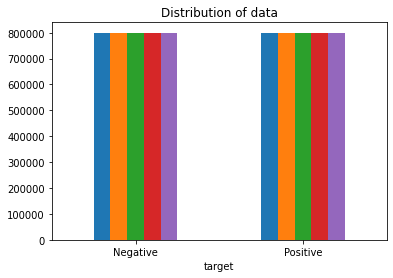

In [ ]:
# Plotting the distribution for dataset.
ax = df.groupby('target').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)
# Storing data in lists.
text, sentiment = list(df['text']), list(df['target'])

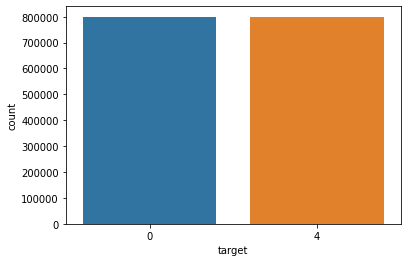

In [ ]:
import seaborn as sns
sns.countplot(x='target', data=df)

5.1: Selecting the text and Target column for our further analysis

In [ ]:
data=df[['text','target']]
data

,text,target
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0
...,...,...
1599995,Just woke up. Having no school is the best fee...,4
1599996,TheWDB.com - Very cool to hear old Walt interv...,4
1599997,Are you ready for your MoJo Makeover? Ask me f...,4
1599998,Happy 38th Birthday to my boo of alll time!!! ...,4


In [ ]:
data['target'] = data['target'].replace(4,1)

<ipython-input-47-54c9eb4fa536>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target'] = data['target'].replace(4,1)


In [ ]:
data['target'].unique()

array([0, 4])

In [ ]:
data_pos = data[data['target'] == 1]
data_neg = data[data['target'] == 0]

In [ ]:
data_pos = data_pos.iloc[:int(20000)]
data_neg = data_neg.iloc[:int(20000)]

In [ ]:
dataset = pd.concat([data_pos, data_neg])

In [ ]:
dataset['text']=dataset['text'].str.lower()
dataset['text'].tail()

19995    not much time off this weekend, work trip to m...
19996                            one more day of holidays 
19997    feeling so down right now .. i hate you damn h...
19998    geez,i hv to read the whole book of personalit...
19999    i threw my sign at donnie and he bent over to ...
Name: text, dtype: object

In [ ]:
import nltk

nltk.download('stopwords')


True


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stopwordlist = nltk.corpus.stopwords.words('english')
print(stopwordlist)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

5.9: Cleaning and removing the above stop words list from the tweet text

In [ ]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))
dataset['text'].head()

0    @switchfoot http://twitpic.com/2y1zl - awww, t...
1    upset can't update facebook texting it... migh...
2    @kenichan dived many times ball. managed save ...
3                     whole body feels itchy like fire
4    @nationwideclass no, behaving all. i'm mad. he...
Name: text, dtype: object

5.10: Cleaning and removing punctuations

In [ ]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'].tail()

5.11: Cleaning and removing repeating characters

In [ ]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
dataset['text'].tail()

19995    much time weekend, work trip malmï¿½ fri-sat t...
19996                                     one day holidays
19997                   feeling right .. hate damn humprey
19998    geez,i hv read whole book personality types em...
19999     threw sign donnie bent get thingee made sad face
Name: text, dtype: object

5.12: Cleaning and removing URL’s

In [ ]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'].tail()

19995    much time weekend, work trip malmï¿½ fri-sat t...
19996                                     one day holidays
19997                   feeling right .. hate damn humprey
19998    geez,i hv read whole book personality types em...
19999     threw sign donnie bent get thingee made sad face
Name: text, dtype: object

5.13: Cleaning and removing Numeric numbers

In [ ]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].tail()

19995    much time weekend, work trip malmï¿½ fri-sat t...
19996                                     one day holidays
19997                   feeling right .. hate damn humprey
19998    geez,i hv read whole book personality types em...
19999     threw sign donnie bent get thingee made sad face
Name: text, dtype: object

5.14: Getting tokenization of tweet text

In [ ]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'w+')
dataset['text'] = dataset['text'].apply(tokenizer.tokenize)
dataset['text'].head()

0    [w]
1     []
2     []
3    [w]
4    [w]
Name: text, dtype: object